In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable  # Para poder poner colorbars para cada subplot

### Elementos Matematicos

In [52]:
def RK4_3Coupled(funcs:tuple,step:float,Interval:tuple,InitCond:tuple):
    F , G , H = funcs
    h=step
    t=Interval[0]
    tmax=Interval[1]
    x=InitCond[0]
    y=InitCond[1]
    z=InitCond[2]
    T=[t]
    X=[x]
    Y=[y]
    Z=[z]
    # Generacion de datos
    while t<=tmax:
        k1x=F(t , x , y , z)
        k1y=G(t , x , y , z)
        k1z=H(t , x , y , z)
        k2x=F(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y , z + 0.5*h*k1z)
        k2y=G(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y , z + 0.5*h*k1z)
        k2z=H(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y , z + 0.5*h*k1z)
        k3x=F(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y , z + 0.5*h*k2z)
        k3y=G(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y , z + 0.5*h*k2z)
        k3z=H(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y , z + 0.5*h*k2z)
        k4x=F(t + h , x + k3x*h , y + k3y*h , z + k3z*h)
        k4y=G(t + h , x + k3x*h , y + k3y*h , z + k3z*h)
        k4z=H(t + h , x + k3x*h , y + k3y*h , z + k3z*h)
        x+=(h/6)*(k1x + 2*k2x + 2*k3x + k4x)
        y+=(h/6)*(k1y + 2*k2y + 2*k3y + k4y)
        z+=(h/6)*(k1z + 2*k2z + 2*k3z + k4z)
        t+=h 
        X.append(x)
        Y.append(y)
        Z.append(z)
        T.append(t)

    return T,X,Y,Z

def RK4_4Coupled(funcs:tuple,step:float,Interval:tuple,InitCond:tuple):
    F , G , H , J = funcs
    h=step
    t=Interval[0]
    tmax=Interval[1]
    x=InitCond[0]
    y=InitCond[1]
    z=InitCond[2]
    w=InitCond[3]
    T=[t]
    X=[x]
    Y=[y]
    Z=[z]
    W=[w]
    # Generacion de datos
    while t<=tmax:
        k1x=F(t , x , y , z , w)
        k1y=G(t , x , y , z , w)
        k1z=H(t , x , y , z , w)
        k1w=J(t , x , y , z , w)
        k2x=F(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y , z + 0.5*h*k1z , w + 0.5*h*k1w)
        k2y=G(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y , z + 0.5*h*k1z , w + 0.5*h*k1w)
        k2z=H(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y , z + 0.5*h*k1z , w + 0.5*h*k1w)
        k2w=J(t + 0.5*h , x + 0.5*h*k1x , y + 0.5*h*k1y , z + 0.5*h*k1z , w + 0.5*h*k1w)
        k3x=F(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y , z + 0.5*h*k2z , w + 0.5*h*k2w)
        k3y=G(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y , z + 0.5*h*k2z , w + 0.5*h*k2w)
        k3z=H(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y , z + 0.5*h*k2z , w + 0.5*h*k2w)
        k3w=J(t + 0.5*h , x + 0.5*h*k2x , y + 0.5*h*k2y , z + 0.5*h*k2z , w + 0.5*h*k2w)
        k4x=F(t + h , x + k3x*h , y + k3y*h , z + k3z*h , w + k3w*h)
        k4y=G(t + h , x + k3x*h , y + k3y*h , z + k3z*h , w + k3w*h)
        k4z=H(t + h , x + k3x*h , y + k3y*h , z + k3z*h , w + k3w*h)
        k4w=J(t + h , x + k3x*h , y + k3y*h , z + k3z*h , w + k3w*h)
        x+=(h/6)*(k1x + 2*k2x + 2*k3x + k4x)
        y+=(h/6)*(k1y + 2*k2y + 2*k3y + k4y)
        z+=(h/6)*(k1z + 2*k2z + 2*k3z + k4z)
        w+=(h/6)*(k1w + 2*k2w + 2*k3w + k4w)
        t+=h 
        X.append(x)
        Y.append(y)
        Z.append(z)
        W.append(w)
        T.append(t)

    return T,X,Y,Z,W

def VectorizedLaplacian(M,dx:float,dy:float):
    Interior = M[1:-1,1:-1] # No podemos aplicar el laplaciano en el borde, pues nos saldriamos del grid
    Izq = M[1:-1,0:-2]  # x-h
    Der = M[1:-1,2:]  # x+h
    Sup = M[0:-2,1:-1]  # y-h
    Inf = M[2:,1:-1] # y+h
    Mxx = (Izq + Der - 2*Interior) / (dx**2)
    Myy = (Sup + Inf - 2*Interior) / (dy**2)
    return Mxx + Myy

def VectorizedLocalLaplacian(M):
    Interior = M[1:-1,1:-1] # No podemos aplicar el laplaciano en el borde, pues nos saldriamos del grid
    Izq = M[1:-1,0:-2]  # x-h
    Der = M[1:-1,2:]  # x+h
    Sup = M[0:-2,1:-1]  # y-h
    Inf = M[2:,1:-1] # y+h
    return Izq + Der + Sup + Inf - 4*Interior

### Elementos Electronicos

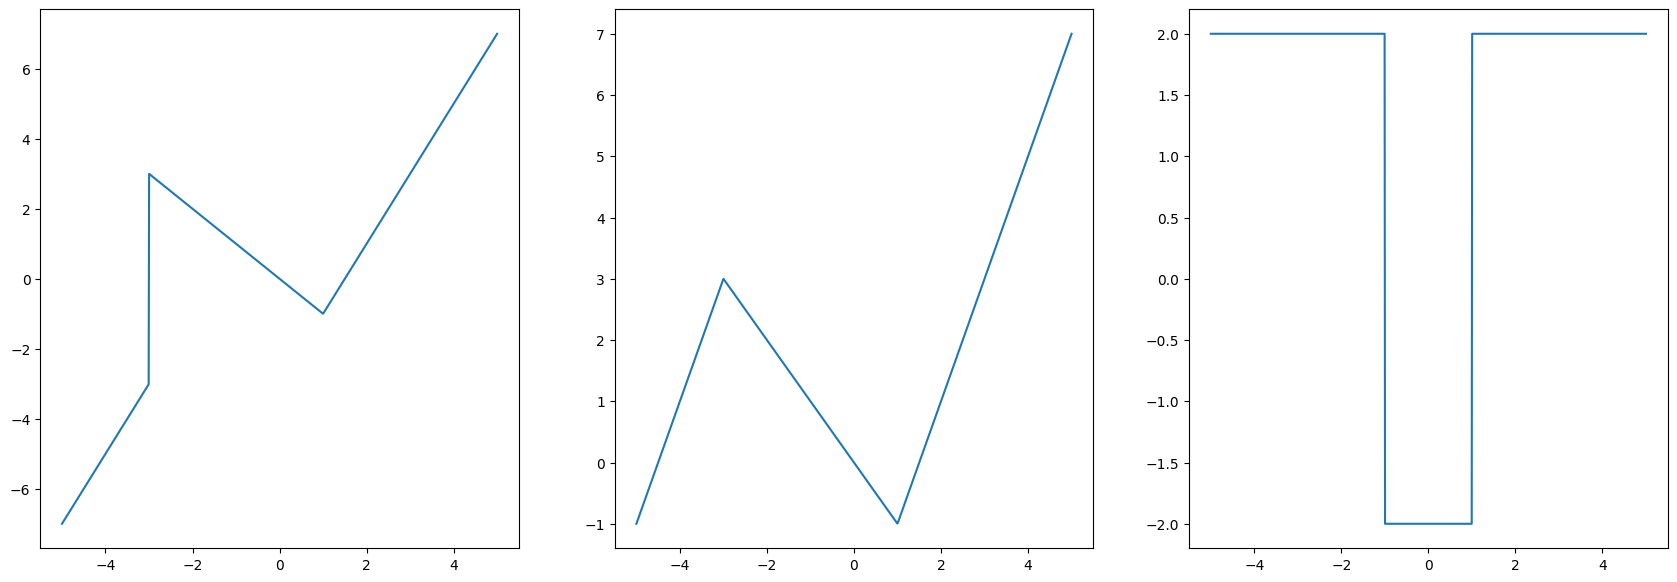

In [53]:
def MIPL_Memristor(flux,a,b):
    return a if np.abs(flux)<1 else b

MIPL_Memristor = np.vectorize(MIPL_Memristor)

def ChuaDiodeF(x,m1,m2,m3,x1,x2,e):
    return m1*x - (m2-m1) + e if x<=x1 else m3*x + (m2-m1) + e if x>=x2 else m2*x + e

def ChuaDiodeG(x,m1,m2,m3,x1,x2,e):
    return m1*x + (m2-m1)*x1 + e if x<=x1 else m3*x + (m2-m1)*x2 + e if x>=x2 else m2*x + e

ChuaDiodeF = np.vectorize(ChuaDiodeF)
ChuaDiodeG = np.vectorize(ChuaDiodeG)

fig , axes = plt.subplots(1,3,figsize=(21,7))
x = np.linspace(-5,5,1000)
axes[0].plot(x,ChuaDiodeF(x,2,-1,2,-3,1,0))
axes[1].plot(x,ChuaDiodeG(x,2,-1,2,-3,1,0))
axes[2].plot(x,MIPL_Memristor(x,-2,2))
plt.show()

## Behaviour, Chaos and Attractors 

In [54]:
def ThirdOrderSystem(funcs:tuple,step,Interval,InitConds:tuple):
    T , x , y , z = RK4_3Coupled(funcs,step,Interval,InitConds)
    # Evolucion Temporal
    fig , axes = plt.subplots(3,1,figsize=(14,7),layout='tight')
    axes[0].plot(T,x,linewidth=1.1)
    axes[0].set_ylabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[1].plot(T,y,linewidth=1.1)
    axes[1].set_ylabel(r"$y$", rotation="horizontal", fontsize=20)
    axes[2].plot(T,z,linewidth=1.1)
    axes[2].set_ylabel(r"$z$", rotation="horizontal", fontsize=20)
    plt.xlabel(r"$t$", fontsize=20)
    for ax in axes.flat:
        ax.tick_params(which = 'both', direction = 'in',labelsize=15)
    plt.show()
    # Espacio de Fase 2D
    fig , axes = plt.subplots(1,3,figsize=(21,7))
    axes[0].plot(x,y,linewidth=0.4)
    axes[0].set_xlabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[0].set_ylabel(r"$y$", rotation="horizontal", fontsize=20)
    axes[1].plot(x,z,linewidth=0.4)
    axes[1].set_xlabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[1].set_ylabel(r"$z$", rotation="horizontal", fontsize=20)
    axes[2].plot(y,z,linewidth=0.4)
    axes[2].set_xlabel(r"$y$", rotation="horizontal", fontsize=20)
    axes[2].set_ylabel(r"$z$", rotation="horizontal", fontsize=20)
    for ax in axes.flat:
        ax.tick_params(which = 'both', direction = 'in',labelsize=15)
    plt.show()
    # Espacio de Fase 3D
    fig , ax = plt.subplots(figsize=(8,7),subplot_kw=dict(projection='3d'))
    ax.plot(x,y,z,linewidth=0.4)
    ax.set_xlabel(r"$x$", rotation="horizontal", fontsize=20)
    ax.set_ylabel(r"$y$", rotation="horizontal", fontsize=20)
    ax.set_zlabel(r"$z$", rotation="horizontal", fontsize=20)
    ax.tick_params(which = 'both', direction = 'in',labelsize=15)
    plt.show()


def FourthOrderSystem(funcs:tuple,step,Interval,InitConds:tuple):
    T , x , y , z , u = RK4_4Coupled(funcs,step,Interval,InitConds)
    # Evolucion Temporal
    fig , axes = plt.subplots(4,1,figsize=(14,7),layout='tight')
    axes[0].plot(T,x,linewidth=1.1)
    axes[0].set_ylabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[1].plot(T,y,linewidth=1.1)
    axes[1].set_ylabel(r"$y$", rotation="horizontal", fontsize=20)
    axes[2].plot(T,z,linewidth=1.1)
    axes[2].set_ylabel(r"$z$", rotation="horizontal", fontsize=20)
    axes[3].plot(T,u,linewidth=1.1)
    axes[3].set_ylabel(r"$u$", rotation="horizontal", fontsize=20)
    plt.xlabel(r"$t$", fontsize=20)
    for ax in axes.flat:
        ax.tick_params(which = 'both', direction = 'in',labelsize=15)
    plt.show()
    # Espacio de Fase 2D
    fig , axes = plt.subplots(2,3,figsize=(19.2,13.5))
    axes[0][0].plot(x,y,linewidth=0.4)
    axes[0][0].set_xlabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[0][0].set_ylabel(r"$y$", rotation="horizontal", fontsize=20)
    axes[0][1].plot(x,z,linewidth=0.4)
    axes[0][1].set_xlabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[0][1].set_ylabel(r"$z$", rotation="horizontal", fontsize=20)
    axes[0][2].plot(x,u,linewidth=0.4)
    axes[0][2].set_xlabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[0][2].set_ylabel(r"$u$", rotation="horizontal", fontsize=20)
    axes[1][0].plot(y,z,linewidth=0.4)
    axes[1][0].set_xlabel(r"$y$", rotation="horizontal", fontsize=20)
    axes[1][0].set_ylabel(r"$z$", rotation="horizontal", fontsize=20)
    axes[1][1].plot(y,u,linewidth=0.4)
    axes[1][1].set_xlabel(r"$y$", rotation="horizontal", fontsize=20)
    axes[1][1].set_ylabel(r"$u$", rotation="horizontal", fontsize=20)
    axes[1][2].plot(z,u,linewidth=0.4)
    axes[1][2].set_xlabel(r"$z$", rotation="horizontal", fontsize=20)
    axes[1][2].set_ylabel(r"$u$", rotation="horizontal", fontsize=20)
    for ax in axes.flat:
        ax.tick_params(which = 'both', direction = 'in',labelsize=15)
    plt.show()
    # Espacio de Fase 3D
    fig , axes = plt.subplots(1,2,figsize=(14,7),subplot_kw=dict(projection='3d'))
    axes[0].plot(x,y,z,linewidth=0.4)
    axes[0].set_xlabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[0].set_ylabel(r"$y$", rotation="horizontal", fontsize=20)
    axes[0].set_zlabel(r"$z$", rotation="horizontal", fontsize=20)
    axes[1].plot(u,x,y,linewidth=0.4)
    axes[1].set_xlabel(r"$u$", rotation="horizontal", fontsize=20)
    axes[1].set_ylabel(r"$x$", rotation="horizontal", fontsize=20)
    axes[1].set_zlabel(r"$y$", rotation="horizontal", fontsize=20)
    for ax in axes.flat:
        # Funcion tick_params para los parametros que no tienen funcion propia (direction,length,width,color,etc)
        ax.tick_params(which = 'both', direction = 'in',labelsize=15)
        axes[1].zaxis._axinfo['juggled'] = (1, 2, 2)
    plt.show()

### Memristor-based Canonical Chua's Oscillator (Ithoh2008 eq98-fig7) (Buscarino2012 eq14-fig5)

$$
\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[Y - X\cdot W\big(U\big)\bigg] \\ 
&\frac{dY}{dt} = Z-X   \\
&\frac{dZ}{dt} = -\beta Y + \gamma Z \\
&\frac{dU}{dt} = X
\end{align*}}
$$

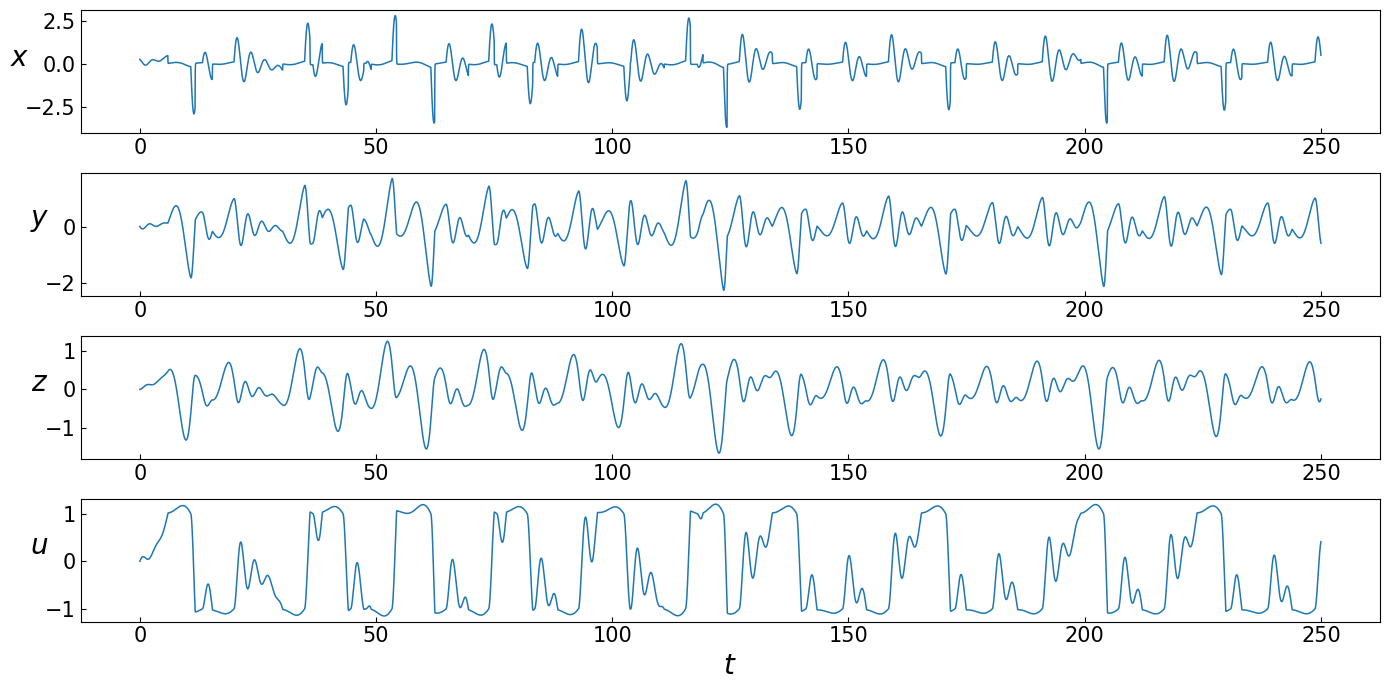

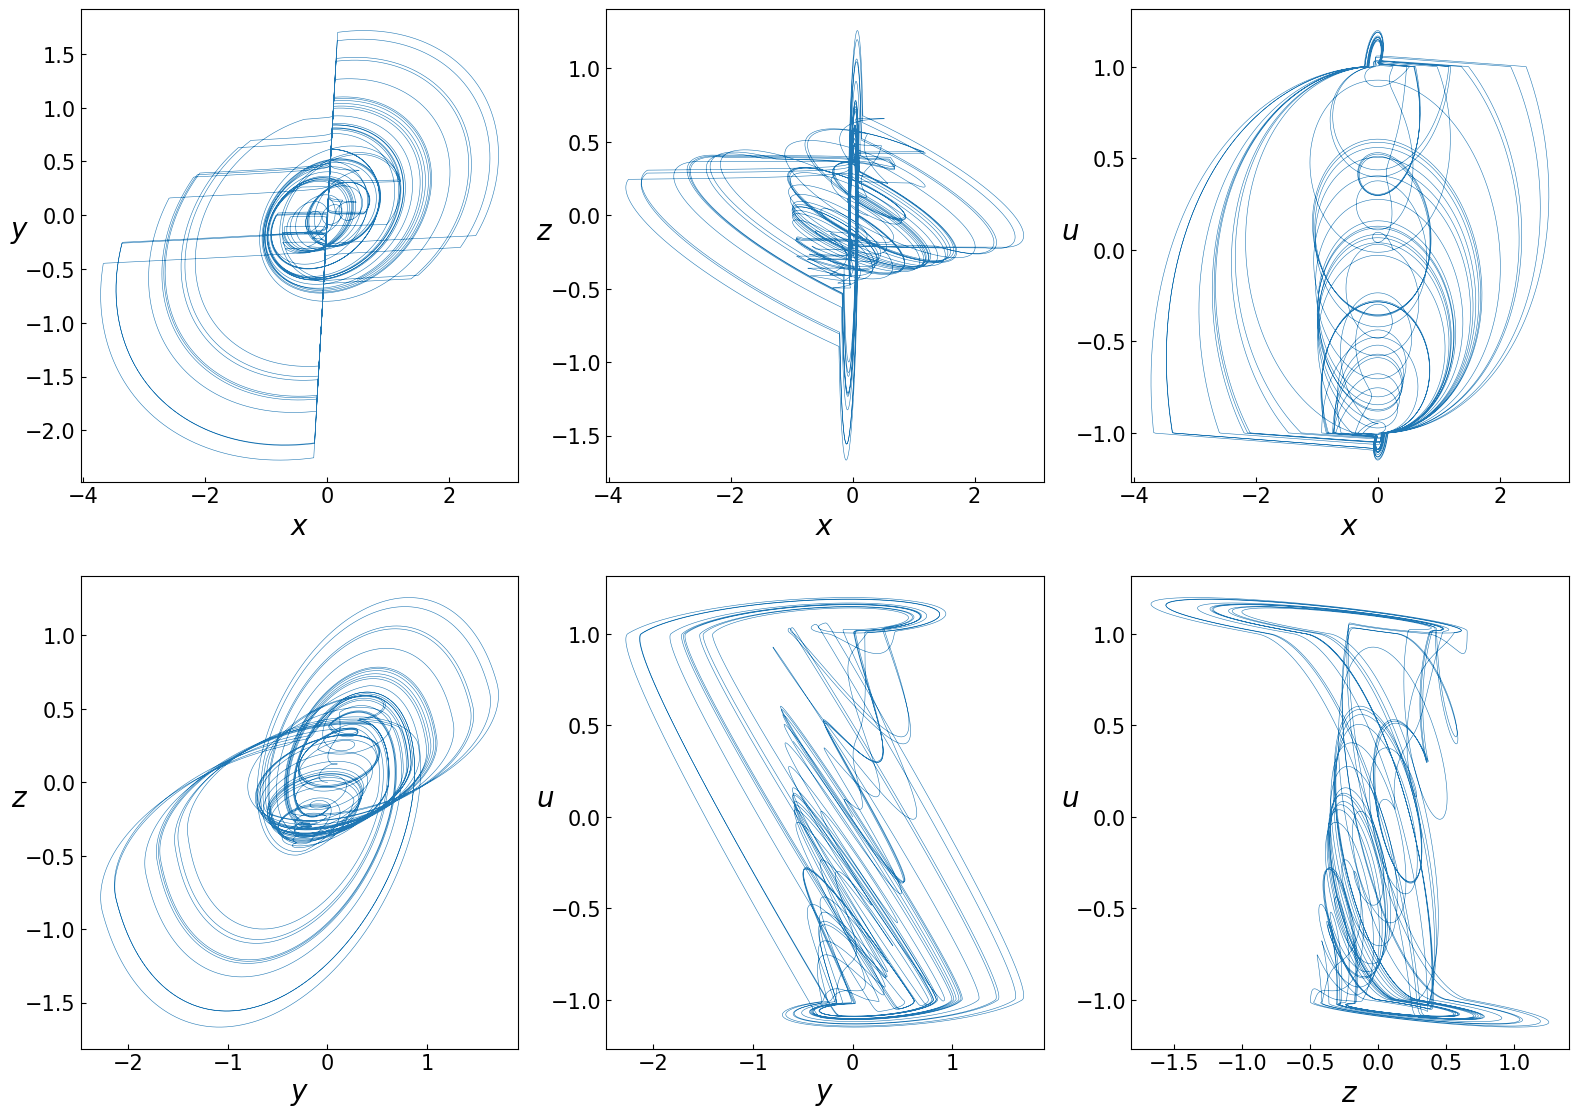

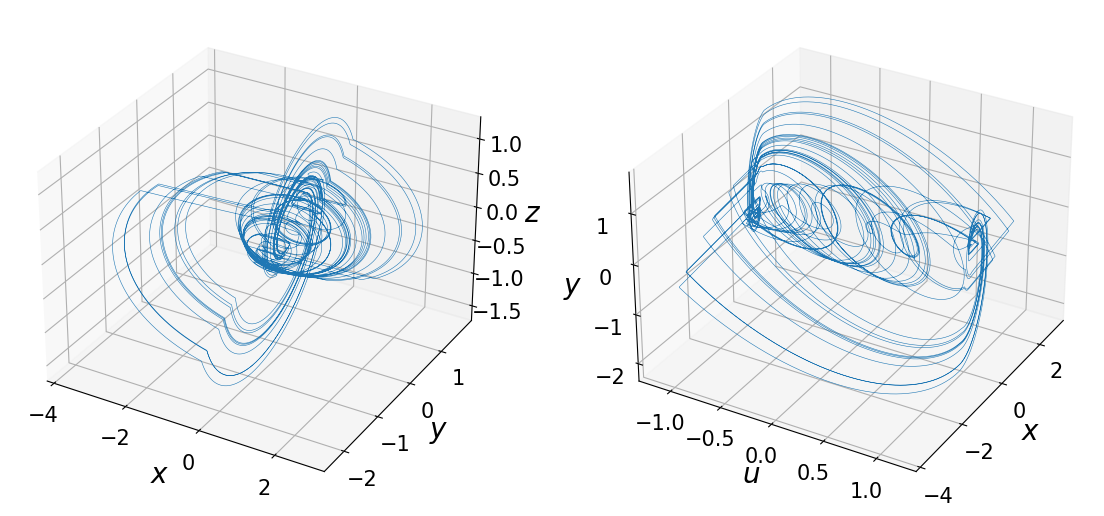

In [55]:
def MemCanCO(SysPar:tuple,MemPar:tuple):
    alpha , beta , gamma = SysPar
    a , b = MemPar
    X = lambda t,x,y,z,u: alpha*(y - x*MIPL_Memristor(u,a,b))
    Y = lambda t,x,y,z,u: z - x
    Z = lambda t,x,y,z,u: -beta*y + gamma*z
    U = lambda t,x,y,z,u: x
    return X,Y,Z,U

SysPar = (4,1,0.65)
MemPar = (0.2,10)
InitConds = (0.25,0,0,0)

MemristorCanonicalCO = MemCanCO(SysPar, MemPar)
FourthOrderSystem(MemristorCanonicalCO,step=0.001,Interval=(0,250),InitConds=InitConds)

### Memristor-based Chua's Oscillator (Ithoh2008 eq98-fig25) (Buscarino2012 eq10-fig2)

$$
\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[Y - X+\xi X -X\cdot W\big(U\big)\bigg] \\ 
&\frac{dY}{dt} = X-Y+Z  \\
&\frac{dZ}{dt} = -\beta Y -\gamma Z \\
&\frac{dU}{dt} = X
\end{align*}}
$$

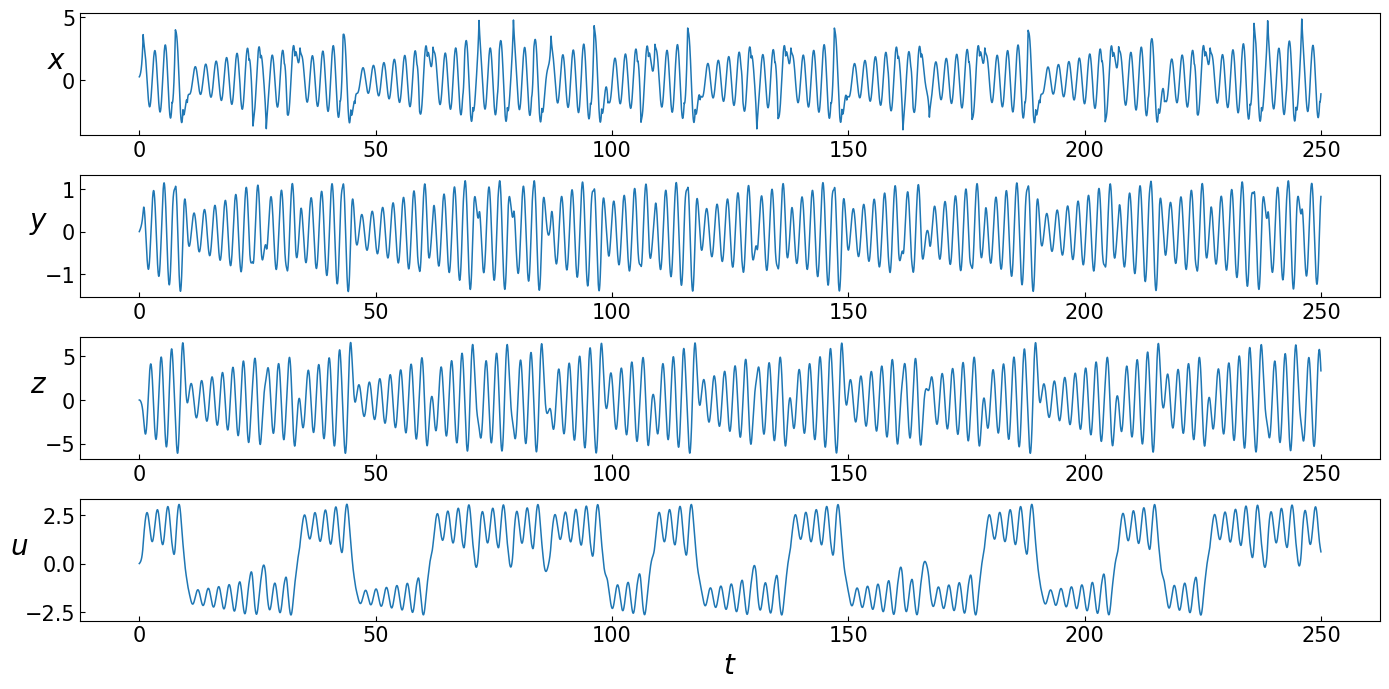

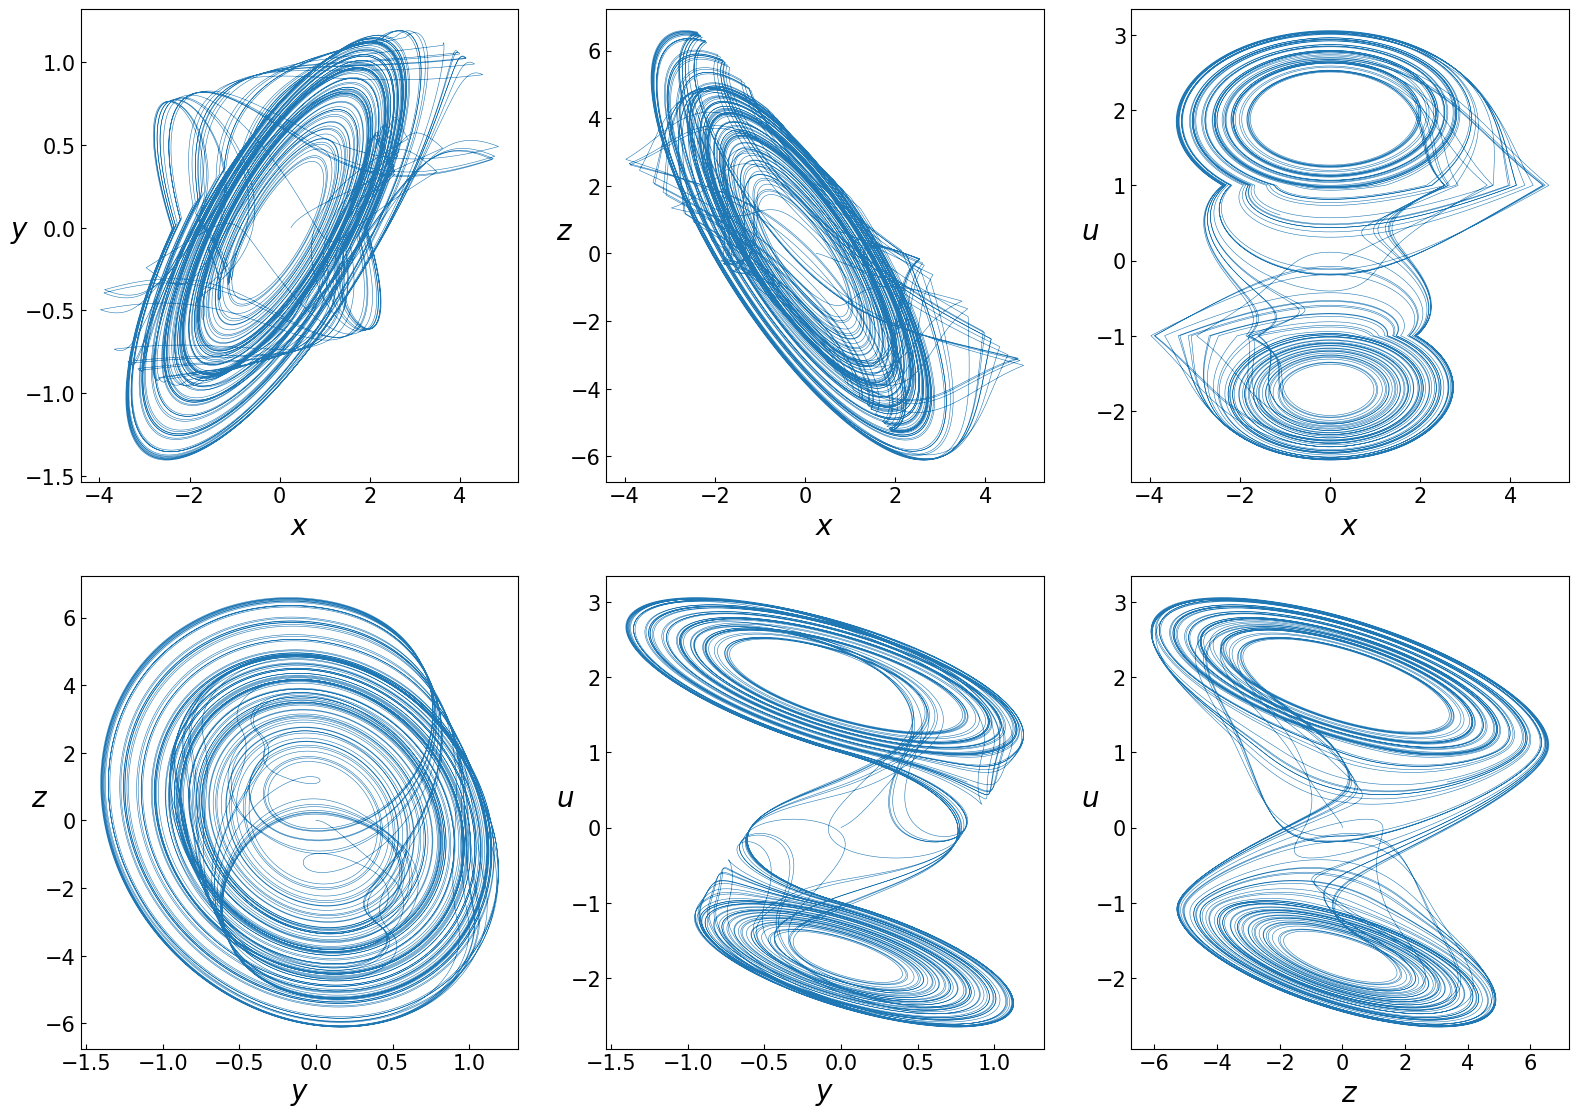

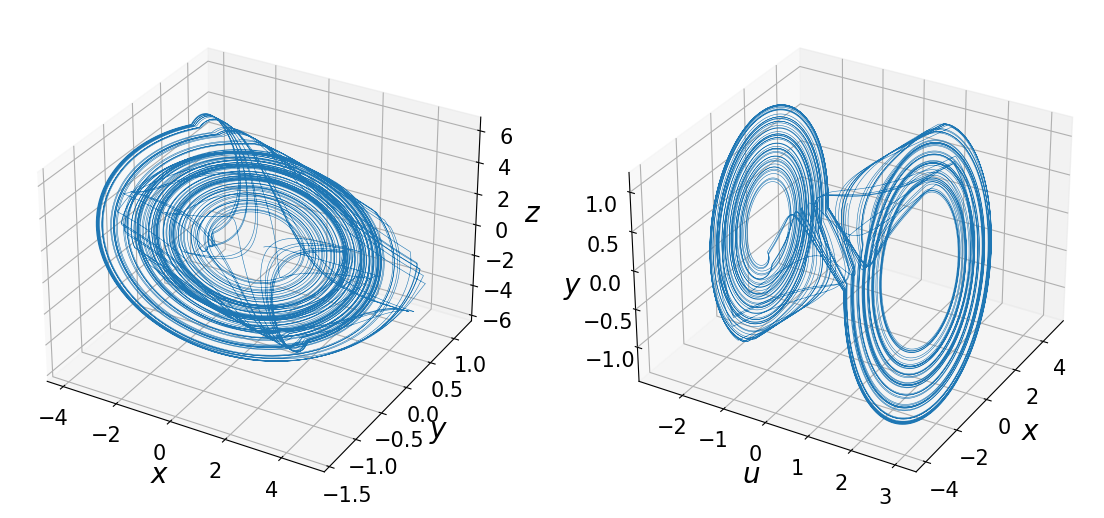

In [56]:
def MemCO(SysPar:tuple,MemPar:tuple):
    alpha , beta , gamma, xi = SysPar
    a , b = MemPar
    X = lambda t,x,y,z,u: alpha*(y - x + xi*x -x*MIPL_Memristor(u,a,b))
    Y = lambda t,x,y,z,u: x - y + z
    Z = lambda t,x,y,z,u: -beta*y -gamma*z
    U = lambda t,x,y,z,u: x
    return X,Y,Z,U

SysPar = (10,13,0.35,1.5)
MemPar = (0.3,0.8)
InitConds = (0.25,0,0,0)

MemristorCO = MemCO(SysPar, MemPar)
FourthOrderSystem(MemristorCO,step=0.001,Interval=(0,250),InitConds=InitConds)

### Modified Memristor-based Canonical Chua's Oscillator (Ithoh2008 eq50-fig11)
$$
\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[Y - X\cdot W\big(U\big)\bigg] \\ 
&\frac{dY}{dt} = -\xi(X+Z)  \\
&\frac{dZ}{dt} = \beta Y  \\
&\frac{dU}{dt} = X
\end{align*}}
$$

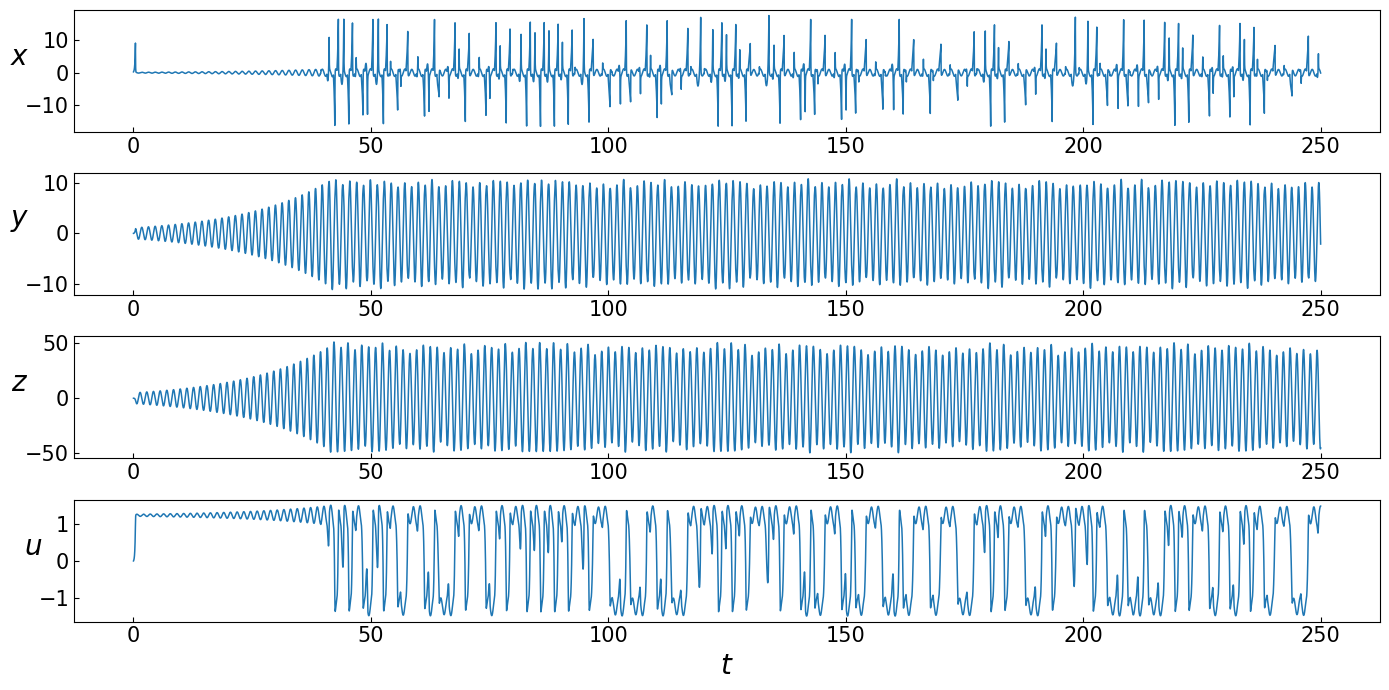

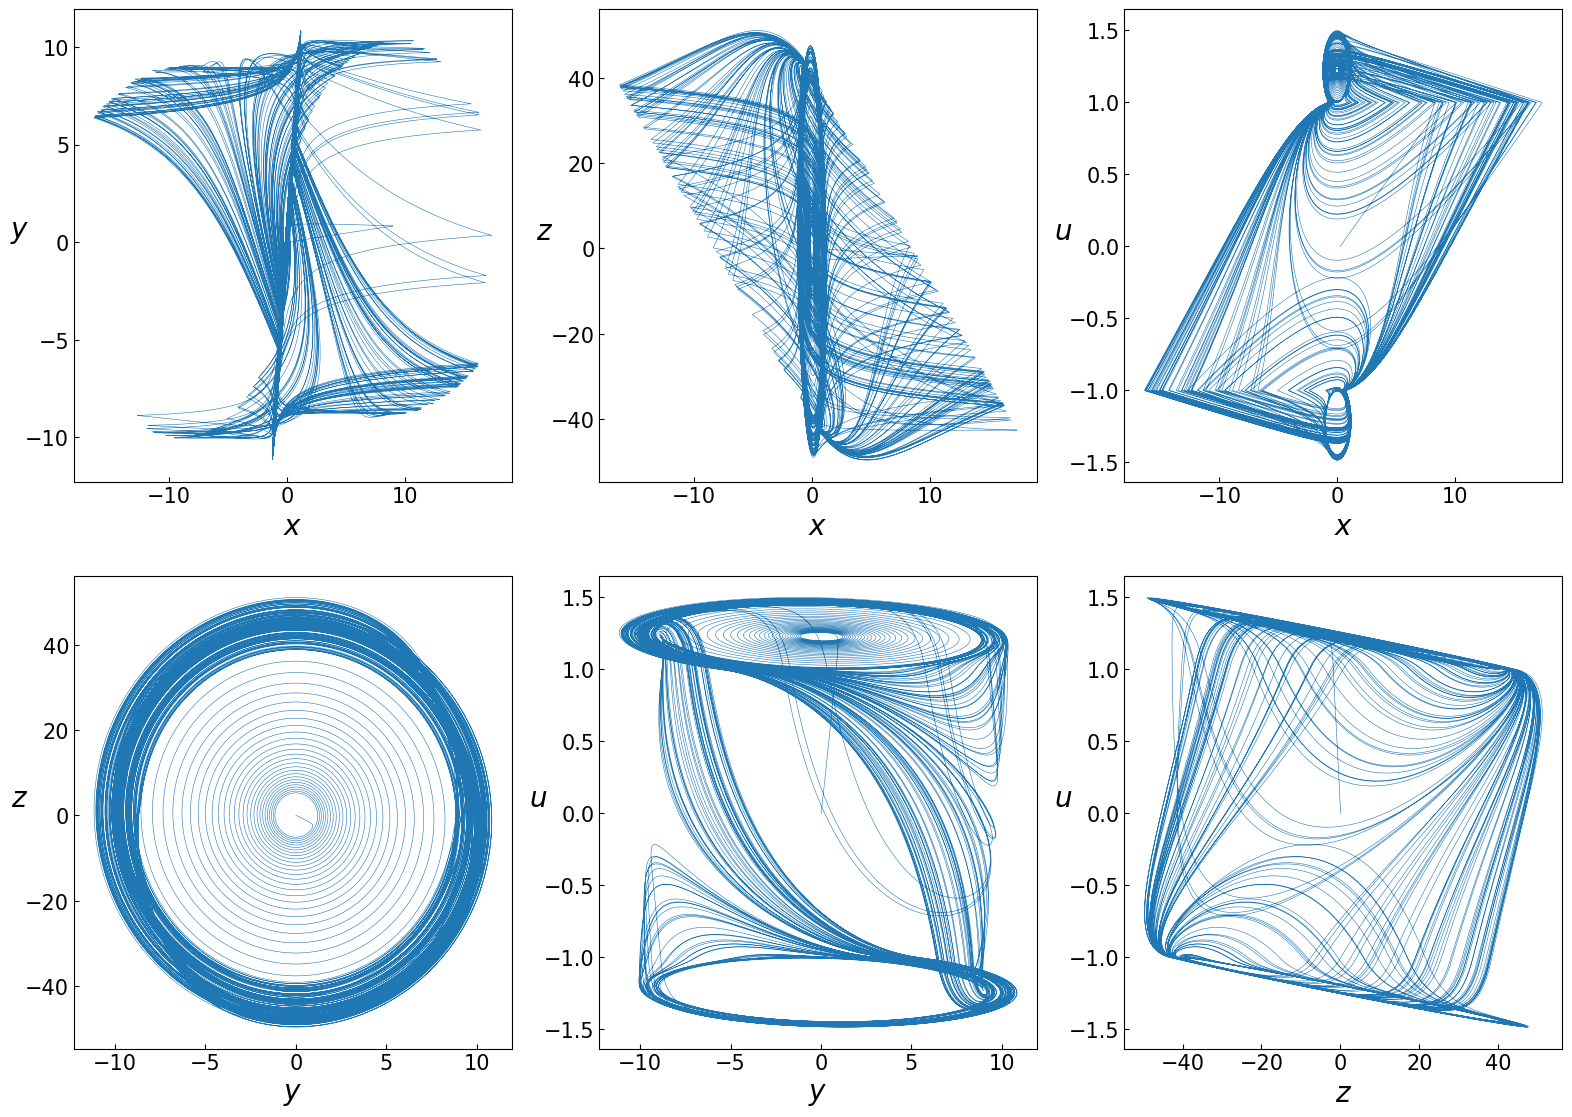

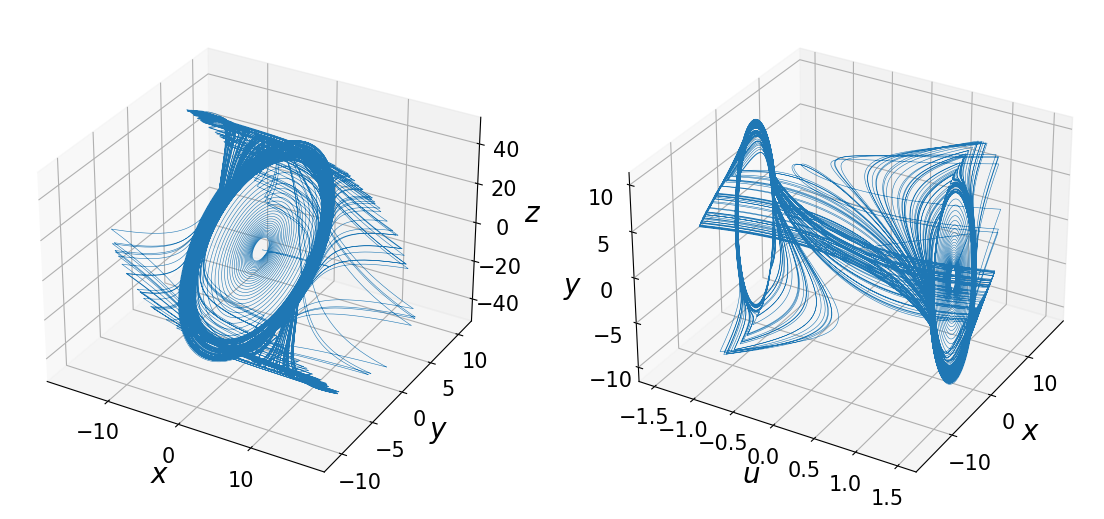

In [57]:
def ModMemCanCO(SysPar:tuple,MemPar:tuple):
    alpha , beta , xi = SysPar
    a , b = MemPar
    X = lambda t,x,y,z,u: alpha*(y - x*MIPL_Memristor(u,a,b))
    Y = lambda t,x,y,z,u: -xi*(x + z)
    Z = lambda t,x,y,z,u: beta*y 
    U = lambda t,x,y,z,u: x
    return X,Y,Z,U

SysPar = (4.2,-20,-1)
MemPar = (-2,9)
InitConds = (0.25,0,0,0)

ModMemristorCanCO = ModMemCanCO(SysPar, MemPar)
FourthOrderSystem(ModMemristorCanCO,step=0.0001,Interval=(0,250),InitConds=InitConds)

### Chua Circuit

$$ 
\begin{align*}
&\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[ Y - X - f\big(X\big)\bigg] \\ 
&\frac{dY}{dt} = X - Y + Z  \\
&\frac{dZ}{dt} = -\gamma Y \\
\end{align*}}

&\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[ Y - g\big(X\big)\bigg] \\ 
&\frac{dY}{dt} = X - Y + Z   \\
&\frac{dZ}{dt} = -\gamma Y \\
\end{align*}}
\\
&\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[ Y - X - f\big(X\big)\bigg] \\ 
&\frac{dY}{dt} = \beta\bigg[ X - Y + Z\bigg]   \\
&\frac{dZ}{dt} = -\gamma Y \\
\end{align*}}

&\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[ Y - g\big(X\big)\bigg] \\ 
&\frac{dY}{dt} = \beta\bigg[ X - Y + Z\bigg]   \\
&\frac{dZ}{dt} = -\gamma Y \\
\end{align*}}
\end{align*}
$$

Las expresiones anteriores se emplean debido a las soluciones en http://www.chuacircuits.com/sim.php y en matsumoto1984

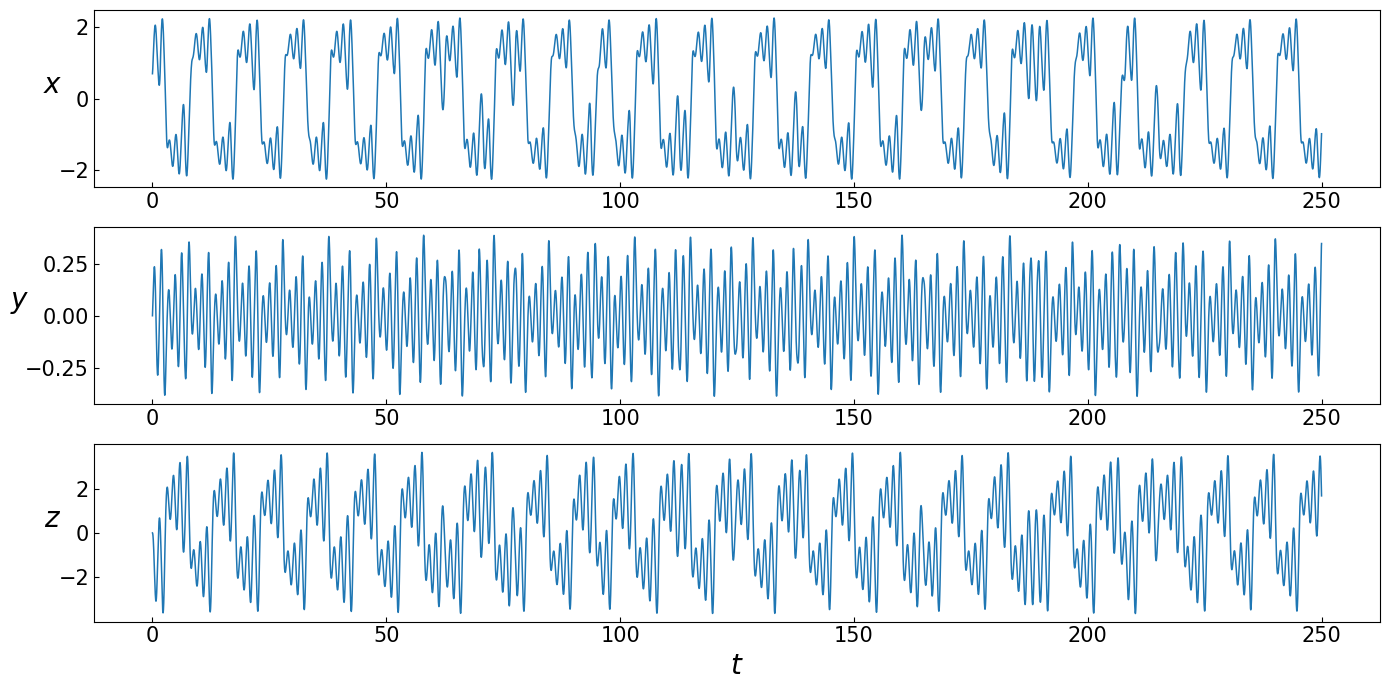

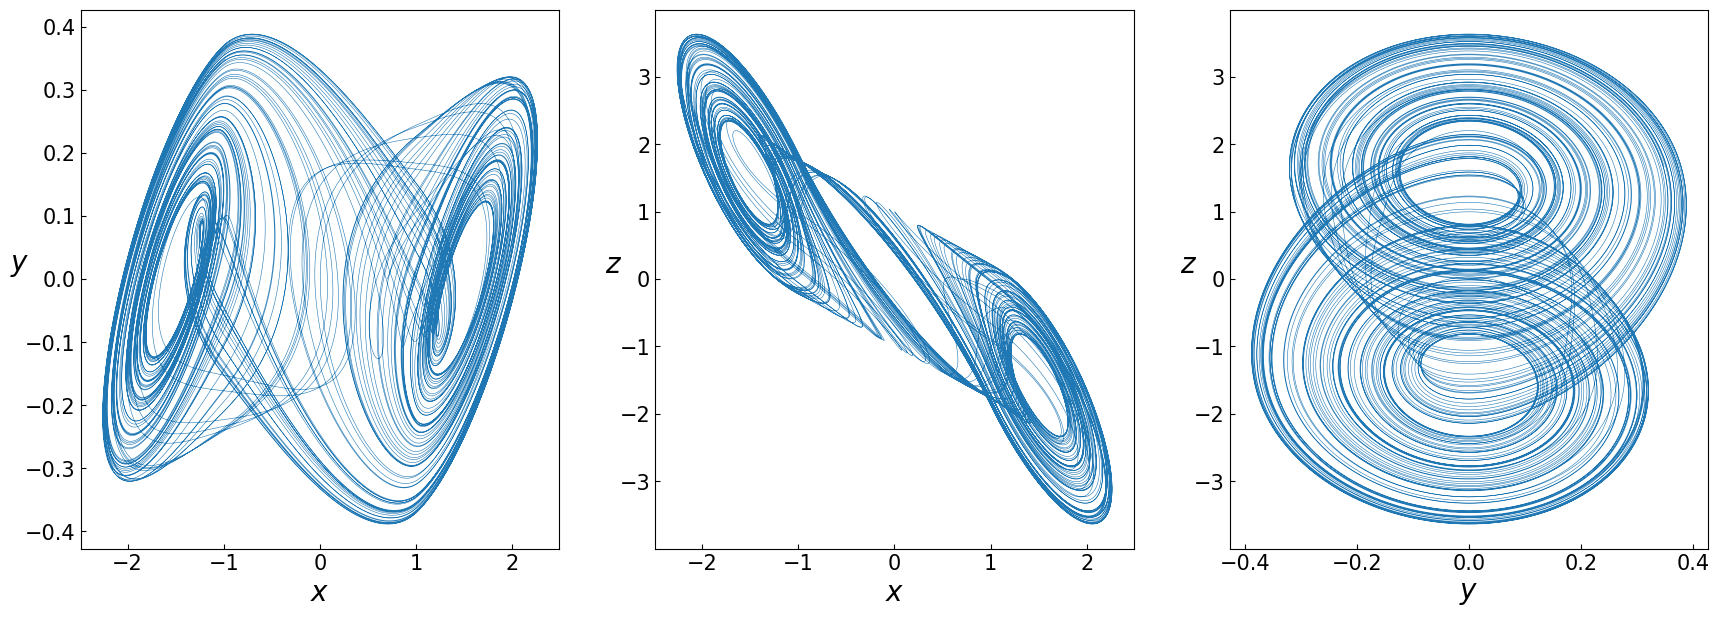

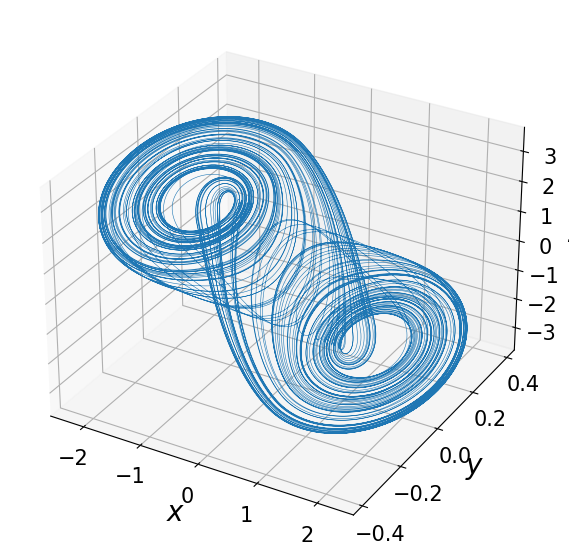

In [58]:
def ChuaCircuitF3(SysPar:tuple,DiodePar:tuple):
    alpha , beta , gamma  = SysPar
    m1, m2, m3, b1, b2, e = DiodePar
    X = lambda t,x,y,z: alpha*(y - x - ChuaDiodeG(x,m1, m2, m3, b1, b2, e))
    Y = lambda t,x,y,z: beta*(x - y + z)
    Z = lambda t,x,y,z: -gamma*y
    return X,Y,Z

def ChuaCircuitG3(SysPar:tuple,DiodePar:tuple):
    alpha , beta , gamma  = SysPar
    m1, m2, m3, b1, b2, e = DiodePar
    X = lambda t,x,y,z: alpha*(y - ChuaDiodeG(x,m1, m2, m3, b1, b2, e))
    Y = lambda t,x,y,z: beta*(x - y + z)
    Z = lambda t,x,y,z: -gamma*y
    return X,Y,Z

SysPar = (15.6 , 1 , 28)
DiodePar = (-0.714 , -1.143 , -0.714 , -1 , 1 , 0)
InitConds = (0.7 , 0 , 0 )

ChuaCirc = ChuaCircuitF3(SysPar, DiodePar)
ThirdOrderSystem(ChuaCirc,step=0.0001,Interval=(0,250),InitConds=InitConds)

### Memristor-based Van der Pol Oscillator (Itoh2008 eq105 - fig28)

$$
\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[- Y - X\cdot W\big(Z\big) + \gamma X\bigg] \\ 
&\frac{dY}{dt} = \beta X \\
&\frac{dZ}{dt} = X
\end{align*}}
$$

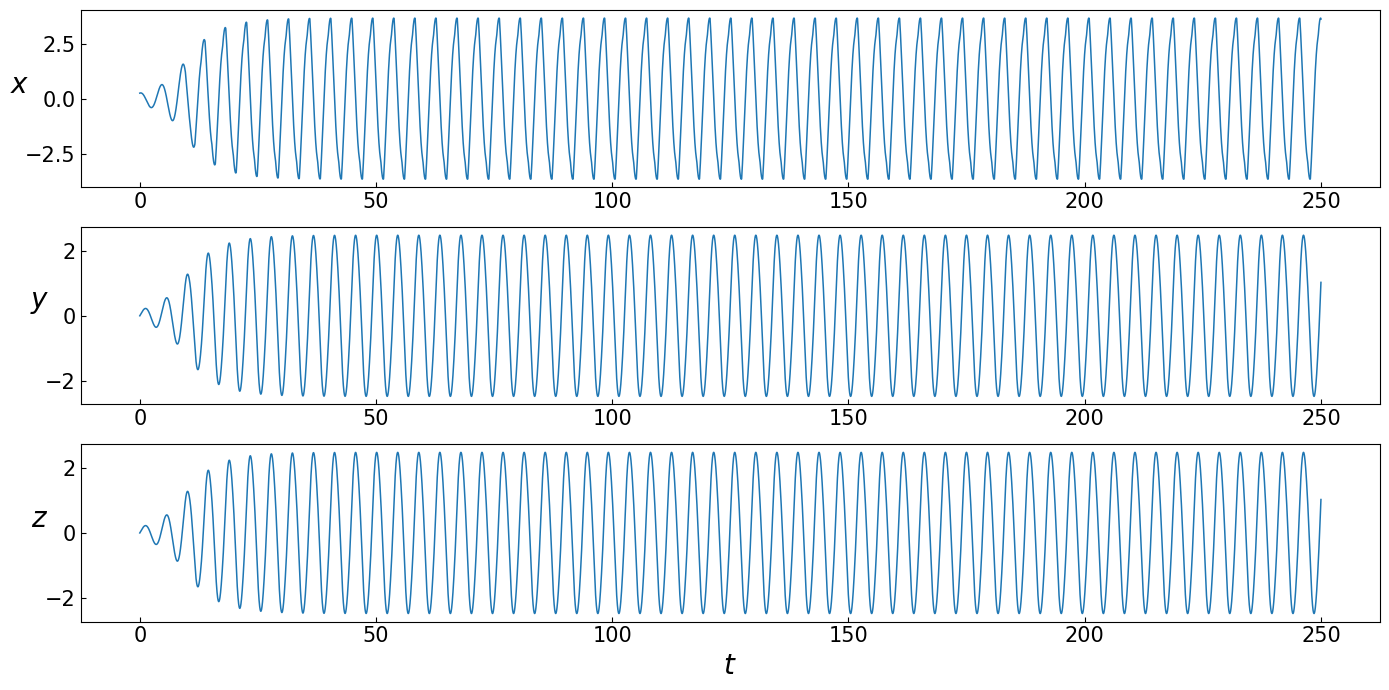

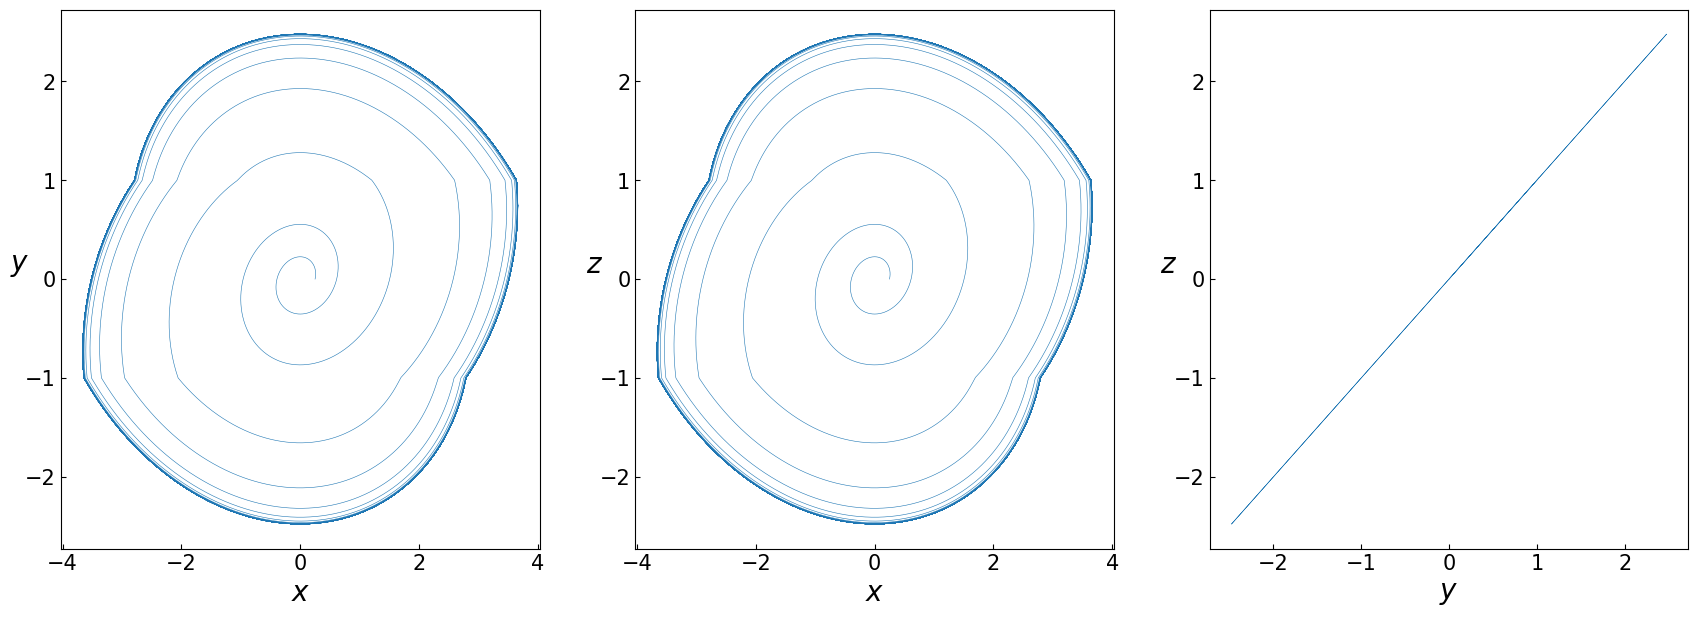

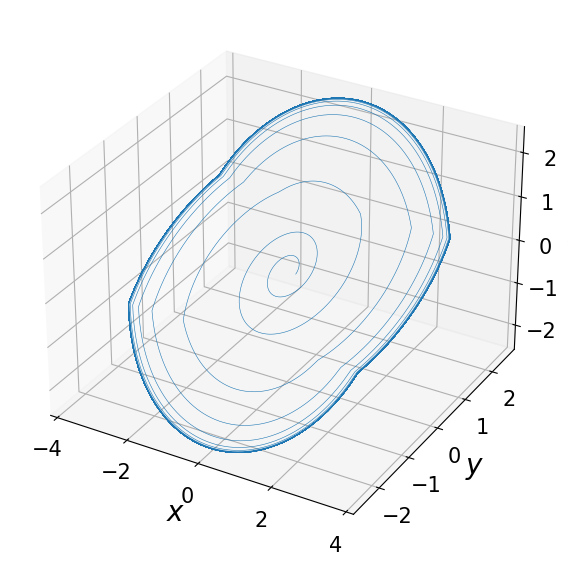

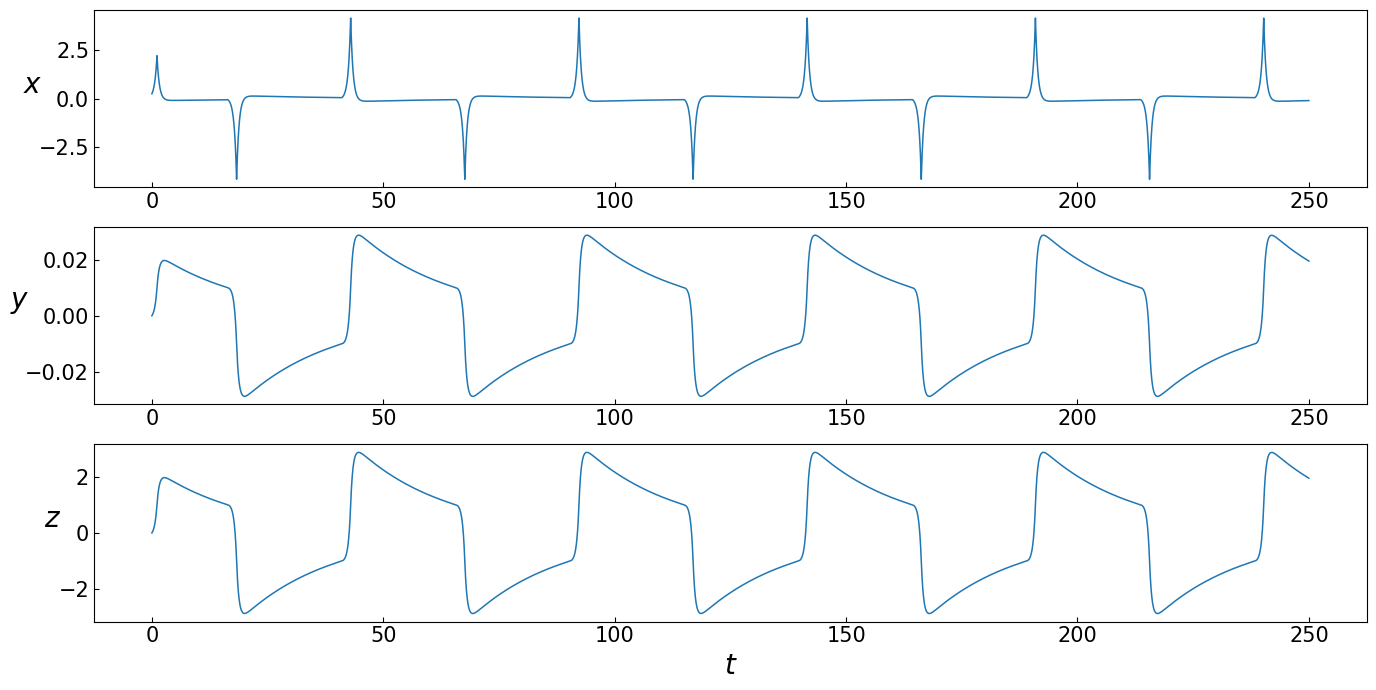

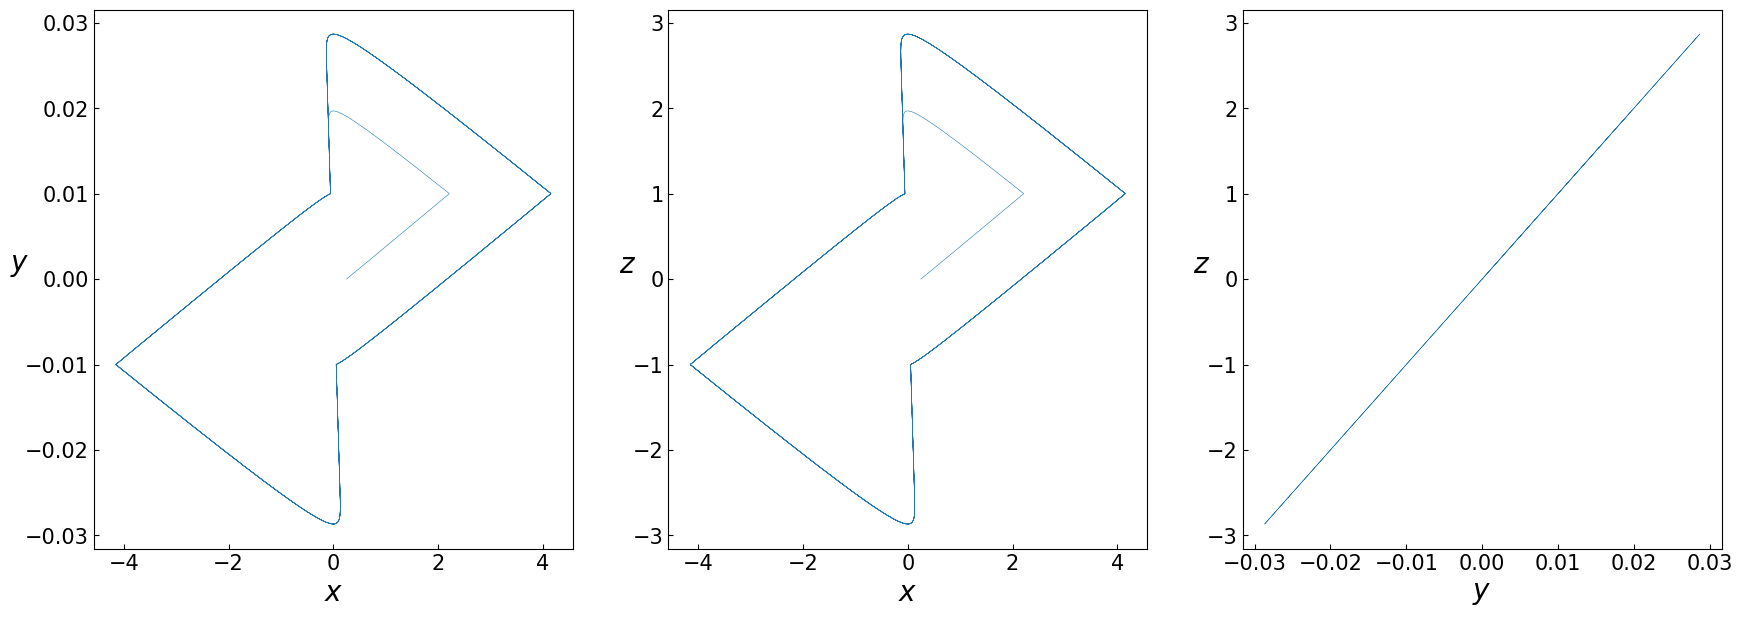

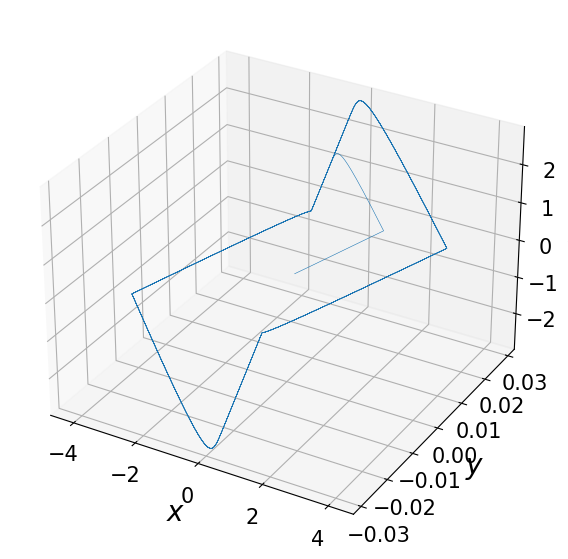

In [59]:
def MemVPO(SysPar:tuple,MemPar:tuple):
    alpha , beta , gamma = SysPar
    a , b = MemPar
    X = lambda t,x,y,z: alpha*(-y - x*MIPL_Memristor(z,a,b) + gamma*x)
    Y = lambda t,x,y,z: beta*x
    Z = lambda t,x,y,z: x
    return X,Y,Z

SysPar1 = (2 , 1 , 0.3)
SysPar2 = (10 , 0.01 , 0.3)
MemPar = (0.1 , 0.5)
InitConds = (0.25 , 0 , 0 )

MemVanPolO1 = MemVPO(SysPar1, MemPar) # Chua
MemVanPolO2 = MemVPO(SysPar2, MemPar) # Pham 2012: Slow-Fast Dynamics for Autowaves ----> But why? Perez 1993
ThirdOrderSystem(MemVanPolO1,step=0.001,Interval=(0,250),InitConds=InitConds)
ThirdOrderSystem(MemVanPolO2,step=0.001,Interval=(0,250),InitConds=InitConds)

## Cellular Neural Networks

### 1-D CNN of Chua Circuits

$$ 
\begin{align*}
&\boxed{\begin{align*}
&\dot{X} = D\,\nabla^2 X + \alpha\bigg[ Y -f\big(X\big)\bigg] \\
&\dot{Y} = X - Y + Z \\
&\dot{Z} = -\beta Y
\end{align*}}
&\boxed{\begin{align*}
&X^{\,n+1}_{\,i\,,\,j} = X^{\,n}_{\,i\,,\,j} + dt\bigg[ D\,\nabla^2 X\bigg] + \alpha\,dt\bigg[ Y^{\,n}_{\,i\,,\,j} - f\big(X^{\,n}_{\,i\,,\,j}\big) \bigg] \\
&Y^{\,n+1}_{\,i\,,\,j} = Y^{\,n}_{\,i\,,\,j} + dt\bigg[X^{\,n}_{\,i\,,\,j} - Y^{\,n}_{\,i\,,\,j} + Z^{\,n}_{\,i\,,\,j} \bigg] \\
&Z^{\,n+1}_{\,i\,,\,j} = Z^{\,n}_{\,i\,,\,j} - dt\,\beta\,Y^{\,n}_{\,i\,,\,j}
\end{align*}} \\

\end{align*}
$$

### Sistemas de reaccion difusion

$$
\begin{align}
\begin{bmatrix}
   \dot{X} \\
   \dot{Y}
\end{bmatrix}
=
\begin{bmatrix}
   D_{\,1\,1} & D_{\,1\,2} \\
   D_{\,2\,1} & D_{\,2\,2}
\end{bmatrix}
\begin{bmatrix}
   \nabla^2 X \\
   \nabla^2 Y
\end{bmatrix}
+
\begin{bmatrix}
   f(X,Y) \\
   g(X,Y)
\end{bmatrix}
\end{align}
$$

In [66]:
def TimeEvolution(M,dt,times:list):
    fig, ax = plt.subplots(2,4,figsize=(12,6),layout='tight')
    for i , ax in enumerate(ax.flat):
        im = ax.imshow(M[int(times[i]/dt)],cmap='viridis', origin='lower', interpolation='bilinear')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.08)
        ax.set_title(f"$t={times[i]}\,s$")
        plt.colorbar(im, cax=cax)
    #fig.suptitle(title, fontsize=16)
    plt.show()

### Memristor-based Van der Pol Oscillator

$$
\boxed{
\begin{align*}
&\frac{dX}{dt} = \alpha\bigg[- Y - X\cdot W\big(Z\big) + \gamma X\bigg] \\ 
&\frac{dY}{dt} = \beta X \\
&\frac{dZ}{dt} = X
\end{align*}}
$$

Se propone un sisteme de reaccion difusion con condiciones de flujo cero en la frontera (a.k.a Neumman Homogeneas)
$$ 
\begin{align*}
&\dot{X} = D_{\,1\,1} \nabla^2 X + \alpha\bigg[ - Y - X\cdot W\big( Z\big) + \gamma X \bigg] \\
&\dot{Y} = \beta X \\
&\dot{Z} = X
\end{align*}
$$
Aplicando diferencias forward en el tiempo y una aproximacion local del laplaciano se obtiene la formula de recursividad
$$
\begin{align}
&X^{\,n+1}_{\,i\,,\,j} = X^{\,n}_{\,i\,,\,j} + dt\bigg[ D_{\,1\,1}\nabla^2 X\bigg] + \alpha\,dt\bigg[ - Y^{\,n}_{\,i\,,\,j} - X^{\,n}_{\,i\,,\,j}\cdot W\big(Z^{\,n}_{\,i\,,\,j}\big) +\gamma X^{\,n}_{\,i\,,\,j} \bigg] \\
&Y^{\,n+1}_{\,i\,,\,j} = Y^{\,n}_{\,i\,,\,j}  + \beta\,dt\,X^{\,n}_{\,i\,,\,j} \\
&Z^{\,n+1}_{\,i\,,\,j} = Z^{\,n}_{\,i\,,\,j} + dt\,X^{\,n}_{\,i\,,\,j}
\end{align} 
$$

In [61]:
def MemVPONetwork(InitialState,Tmax:int,alpha,beta,gamma,a,b,D,dt):
    X0 , Y0 , Z0 = InitialState
    X , Y , Z = X0.copy() , Y0.copy() , Z0.copy()
    y , x = X0.shape[0] , X0.shape[1]
    Iterations = int(Tmax/dt)
    StoreX = np.zeros((Iterations+1,y,x))
    StoreY = np.zeros((Iterations+1,y,x))
    StoreZ = np.zeros((Iterations+1,y,x))
    StoreX[0] = X
    StoreY[0] = Y
    StoreZ[0] = Z
    
    for n in range(Iterations):
        Xint = X[1:-1,1:-1]
        Yint = Y[1:-1,1:-1]
        Zint = Z[1:-1,1:-1]
        Xlap = VectorizedLocalLaplacian(X)
        Ylap = VectorizedLocalLaplacian(Y)
        Zlap = VectorizedLocalLaplacian(Z)

        X[1:-1,1:-1] = Xint + dt*D*Xlap + dt*alpha*(- Yint - Xint*MIPL_Memristor(Zint,a,b) + gamma*Xint)
        Y[1:-1,1:-1] = Yint + dt*beta*Xint
        Z[1:-1,1:-1] = Zint + dt*Xint

        # Condiciones Neumman Homogeneas 
        for M in (X,Y,Z):
            M[0,:] = M[1,:]
            M[-1,:] = M[-2,:]
            M[:,0] = M[:,1]
            M[:,-1] = M[:,-2]

        StoreX[n+1] += X
        StoreY[n+1] += Y
        StoreZ[n+1] += Z

    return StoreX , StoreY , StoreZ

# Parametros del sistema
alpha = 10
beta = 0.01
gamma = 0.3
a = 0.1
b = 0.5
D = 0.51

# Parametros de laS simulaciones
dt = 0.001
x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
t = np.arange(0,14+dt,dt) 
times = [0,2,4,6,8,10,12,14]

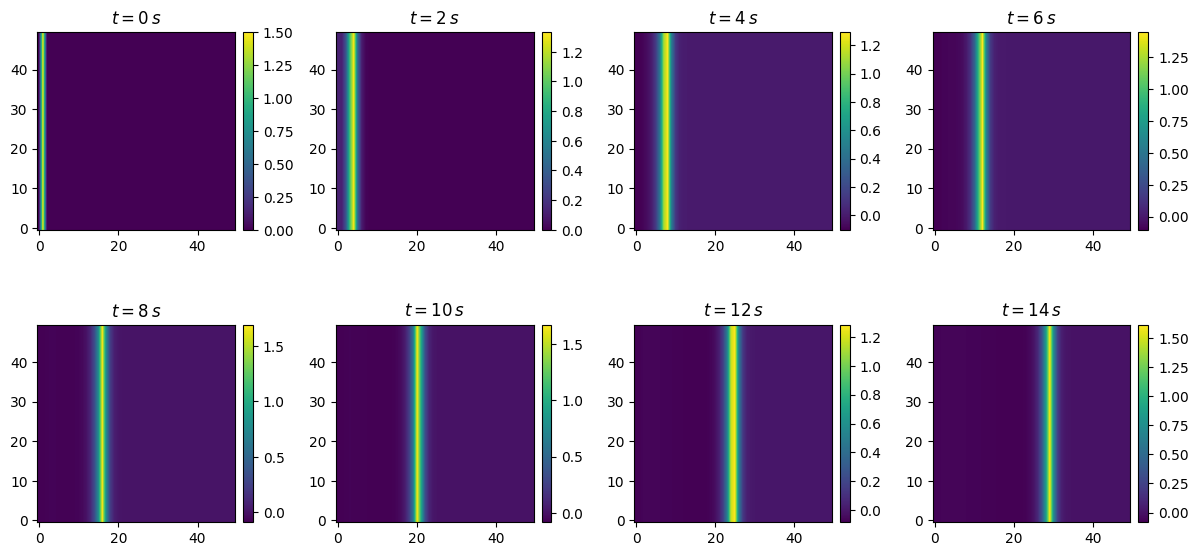

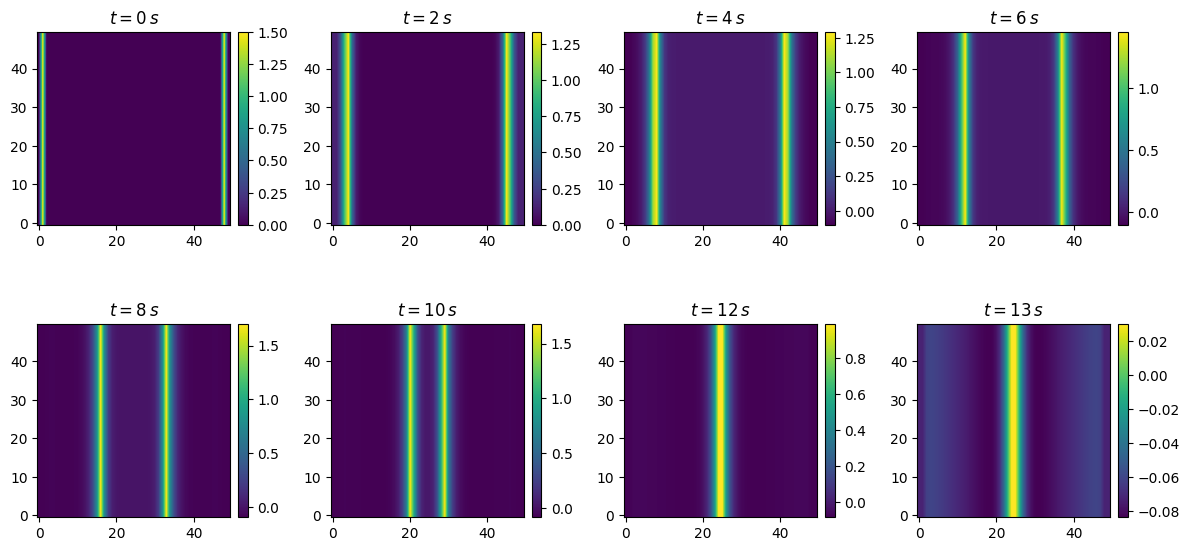

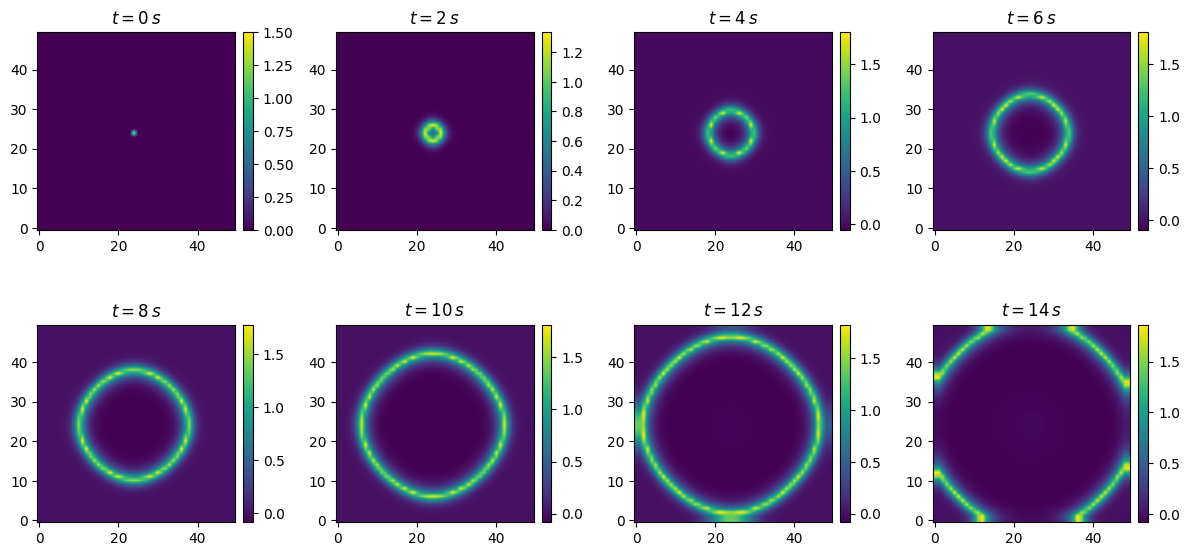

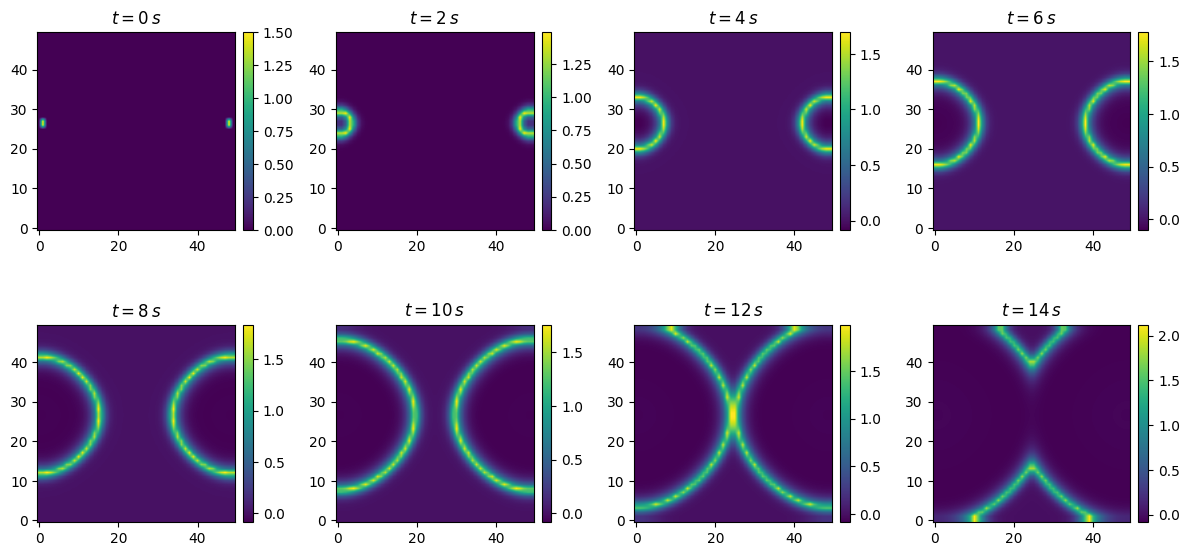

: 

In [67]:
# Onda Plana 
X0 = np.zeros((len(y),len(x)))
Y0 = np.zeros((len(y),len(x)))
Z0 = np.zeros((len(y),len(x)))
X0[:,1] = 1.5

X , Y , Z = MemVPONetwork((X0,Y0,Z0),14,alpha,beta,gamma,a,b,D,dt)
TimeEvolution(X,dt,times)

# Ondas Planas Paralelas
X0 = np.zeros((len(y),len(x)))
Y0 = np.zeros((len(y),len(x)))
Z0 = np.zeros((len(y),len(x)))
X0[:,1] = 1.5
X0[:,-2] = 1.5

X , Y , Z = MemVPONetwork((X0,Y0,Z0),14,alpha,beta,gamma,a,b,D,dt)
TimeEvolution(X,dt,[0,2,4,6,8,10,12,13])

# Onda Esferica
X0 = np.zeros((len(y),len(x)))
Y0 = np.zeros((len(y),len(x)))
Z0 = np.zeros((len(y),len(x)))
X0[24][24] = 1.5

X , Y , Z = MemVPONetwork((X0,Y0,Z0),14,alpha,beta,gamma,a,b,D,dt)
TimeEvolution(X,dt,times)

# Ondas Esfericas Colisionando
X0 = np.zeros((len(y),len(x)))
Y0 = np.zeros((len(y),len(x)))
Z0 = np.zeros((len(y),len(x)))
X0[26][1] = 1.5
X0[27][1] = 1.5
X0[26][48] = 1.5
X0[27][48] = 1.5

X , Y , Z = MemVPONetwork((X0,Y0,Z0),14,alpha,beta,gamma,a,b,D,dt)
TimeEvolution(X,dt,times)